# **PART 1 — Import SMOTE + Advanced ML Libraries**

**Task 1: Import**

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , roc_auc_score

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('/content/payment_fraud_clean.csv')

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_diff,high_amount_flag
count,192592.00000,1.925920e+05,1.925920e+05,1.925920e+05,1.925920e+05,1.925920e+05,192592.000000,192592.0,1.925920e+05,192592.000000
mean,9.95303,3.042991e-16,1.387202e-17,5.017540e-18,-3.453248e-17,1.218967e-16,0.000743,0.0,-1.785726e+04,0.286788
std,2.08112,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.027239,0.0,1.334274e+05,0.452263
min,1.00000,-8.588702e-01,-3.183578e-01,-3.204662e-01,-3.953278e-01,-4.480674e-01,0.000000,0.0,-1.289408e+06,0.000000
25%,9.00000,-7.872414e-01,-3.183578e-01,-3.204662e-01,-3.953278e-01,-4.480674e-01,0.000000,0.0,0.000000e+00,0.000000
50%,10.00000,-4.508057e-01,-3.113644e-01,-3.204662e-01,-3.743374e-01,-3.996593e-01,0.000000,0.0,0.000000e+00,0.000000
75%,11.00000,5.145017e-01,-2.490119e-01,-2.395137e-01,-7.630952e-02,-2.206690e-03,0.000000,0.0,1.067000e+04,1.000000
max,13.00000,2.467116e+00,1.367869e+01,1.349322e+01,1.606901e+01,1.422254e+01,1.000000,0.0,1.000000e+07,1.000000


In [15]:
print(df.shape)

(192592, 16)


In [16]:
print(df.head(5))

   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1 -0.799783  C1231006815      -0.257201       -0.263611  M1979787155   
1     1 -0.847677  C1666544295      -0.310720       -0.313591  M2044282225   
2     1 -0.857785  C1305486145      -0.318293       -0.320466   C553264065   
3     1 -0.857785   C840083671      -0.318293       -0.320466    C38997010   
4     1 -0.788803  C2048537720      -0.303421       -0.309866  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  balance_diff  \
0       -0.395328       -0.448067        0               0       9839.64   
1       -0.395328       -0.448067        0               0       1864.28   
2       -0.395328       -0.448067        1               0        181.00   
3       -0.386395       -0.448067        1               0        181.00   
4       -0.395328       -0.448067        0               0      11668.14   

   high_amount_flag  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFE

# **PART 2 — Apply SMOTE**

**Task 2: Apply SMOTE to training data only**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# 1. Define Features (x) and Target (y)
# we drop 'isFraud' (Target) and the ID columns which are text and will cause errors
x = df.drop(['isFraud', 'nameOrig', 'nameDest','isFlaggedFraud'], axis= 1)
y = df['isFraud']

# 2. Split the data
# This create the messing variables: X_train, X_test, y_train, Y_test
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(" Data Split Successfully !")
print("X_train Shape", x_train.shape)

 Data Split Successfully !
X_train Shape (154073, 12)


In [19]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# **PART 3 — Train Random Forest Model**

**Task 3: Train RF on SMOTE data**

In [20]:
# Notice we fit on 'x_train_res'(the resampled/balance data)
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train_res, y_train_res)

# Make predictions on the original Test set
y_pred_rf = rf.predict(X_test)

# **PART 4 — Evaluate Random Forest Model**

**Evaluate:** **Classification Report ,** **Confusion Matrix ,** **AUC Score ,** **Recall for Fraud Class (Most important!)**

In [21]:
print(classification_report(y_test, y_pred_rf))
print("AUC Score :", roc_auc_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38496
           1       0.19      0.78      0.30        23

    accuracy                           1.00     38519
   macro avg       0.59      0.89      0.65     38519
weighted avg       1.00      1.00      1.00     38519

AUC Score : 0.8902912555567604


# **PART 5 — Train XGBoost (Most Powerful Model)**

**Task 5: Train XGBoost**

In [22]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)


# **PART 6 — Evaluate XGBoost**

**Task 6:
 Print
 (Accuracy,
 Precision, Recall,
AUC, Confusion Matrix)**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

In [24]:
# 1. Make predictions using the XGBoost model you trained
# (Make sure you have already run xgb.fit(..) in the previous step)
y_pred_xgb = xgb.predict(X_test)

# 2. Calculate scores
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

# 3. print the results
print("----- XGBoost performance -----")
print(f"Accuracy : {acc_xgb:.4f}")
print(f"Precision : {prec_xgb:.4f}")
print(f"Recall : {rec_xgb:.4f} <--- Most Important for Fraud!")
print(f"AUC Score : {auc_xgb:.4f}")
print("\nConfusion Matrix : \n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

----- XGBoost performance -----
Accuracy : 0.9995
Precision : 0.5484
Recall : 0.7391 <--- Most Important for Fraud!
AUC Score : 0.8694

Confusion Matrix : 
 [[38482    14]
 [    6    17]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     38496
           1       0.55      0.74      0.63        23

    accuracy                           1.00     38519
   macro avg       0.77      0.87      0.81     38519
weighted avg       1.00      1.00      1.00     38519



# **PART 7 — Compare All Models**

**Task 8: In markdown → create a table**

In [25]:
import pandas as pd

# 1. List the models you have trained
#(if you have 'log_reg' or 'dt' from earlier steps, uncomment those lines)

models_list = [
    # ('Logistic Regression', log_ref),
    #('Decision Tree', 'dt') ,
     ('Random Forest', rf),
     ('XGBoost', xgb)
]

results = []

# 2. Loop through each models and calculate scores
for name, model in models_list:
  #predict
  y_pred = model.predict(X_test)

  # Calcualte matrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)  # Recall for Fraud Class
  auc = roc_auc_score(y_test, y_pred)


  # Add to list
  results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall (FRAUD)": recall,
        "AUC": auc
    })

# 3. Create the Comparison Table
comparison_df = pd.DataFrame(results)

# Display the table
print(comparison_df)

           Model  Accuracy  Precision  Recall (FRAUD)       AUC
0  Random Forest  0.997845   0.187500        0.782609  0.890291
1        XGBoost  0.999481   0.548387        0.739130  0.869383


**Task 8: Plot Feature Importance for Random Forest & XGBoost**

/tmp/ipython-input-2515722042.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_rf, palette='viridis')


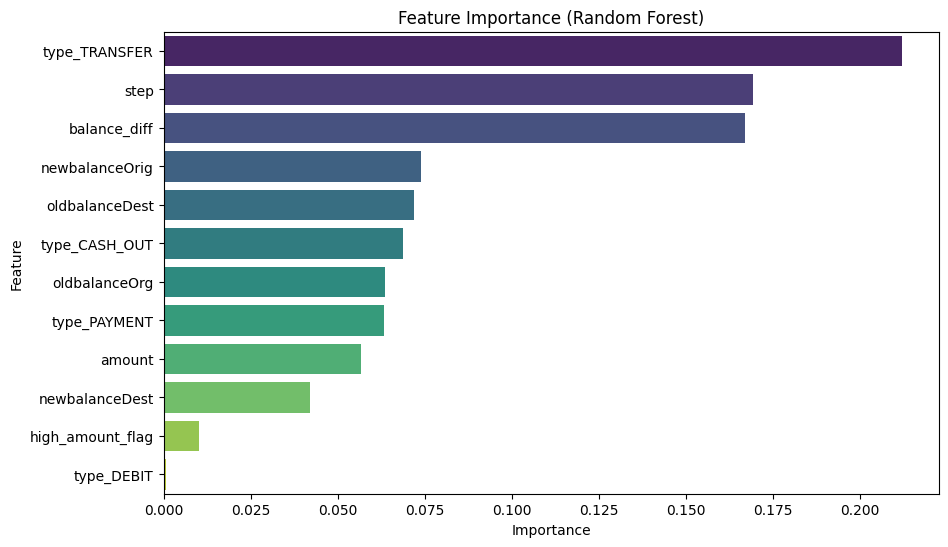

/tmp/ipython-input-2515722042.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_xgb, palette='magma')


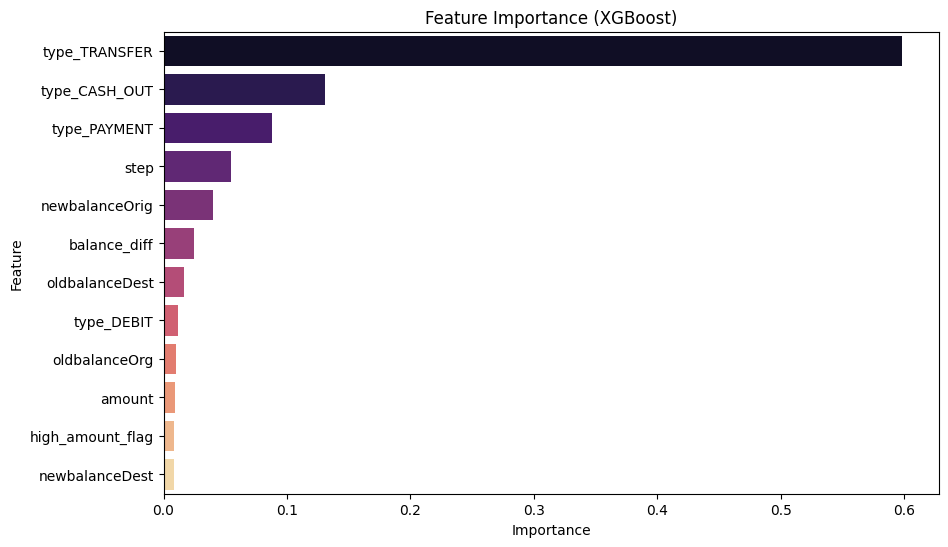

In [29]:
# --- Random Forest Feature Importance ---
# Create a dataframe of features and their importance scores
importances_rf = pd.DataFrame({
    'Feature': x.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_rf, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()

# --- XGBoost Feature Importance ---
# Create a dataframe for XGBoost
importances_xgb = pd.DataFrame({
    'Feature': x.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_xgb, palette='magma')
plt.title('Feature Importance (XGBoost)')
plt.show()

**Task 9: Plot ROC Curves for all 4 models**

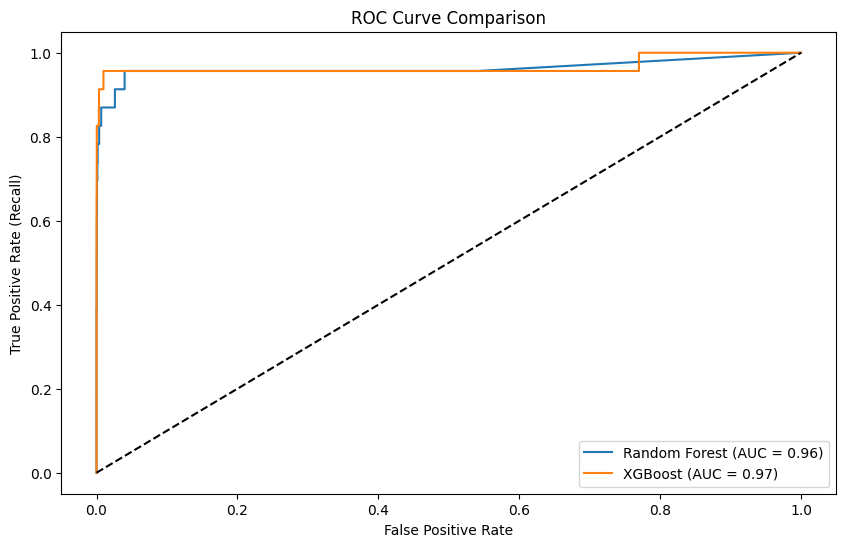

In [30]:
from sklearn.metrics import roc_curve, auc

# 1. Get probability predictions (needed for ROC)
# We use [:, 1] to get the probability of class "1" (Fraud)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# 2. Calculate ROC curve data
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)

# 3. Calculate AUC scores (for the label)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# 4. Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Add labels and legend
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

**Task 10: Confusion Matrix Heatmap**

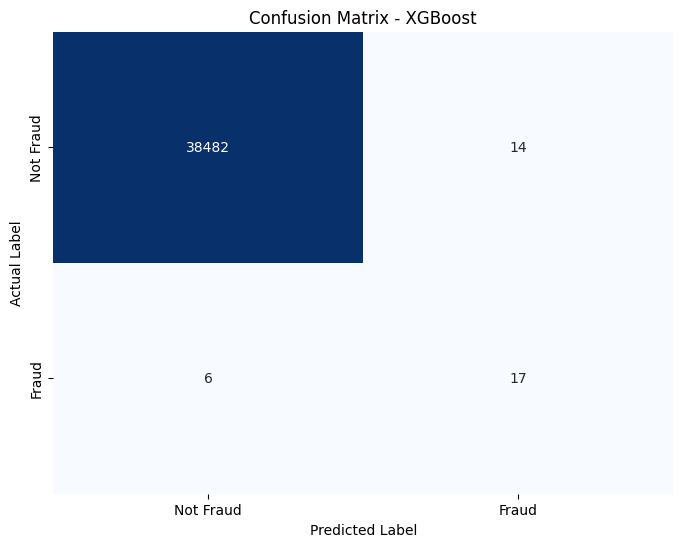

In [31]:
# 1. Calculate the Confusion Matrix
# Replace 'y_pred_xgb' with 'y_pred_rf' if you want to check Random Forest
cm = confusion_matrix(y_test, y_pred_xgb)

# 2. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])

# 3. Add Labels
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()